# Let's create a word cloud of key words found in data science job post using R!

## We will first import the necessary libraries

In [1]:
# import text mining and wordcloud
library(tm)
library(wordcloud)

Loading required package: NLP
Loading required package: RColorBrewer


# We will first load the text data, then clean the text data by lowercasing the words, removing numbers, removing common words found in English, then remove custom words, followed by the removal of punctuation and white spaces

In [9]:
#Set directory path where .txt file is located
dirPath<-"C:/users/takko/desktop/Rwordcloud"

#load data as Corpus
text<-Corpus(DirSource(dirPath))

#Convert text to lowercase
text<-tm_map(text, content_transformer(tolower))

#Remove numbers
text<-tm_map(text, removeNumbers)

#Remove common english stopwords
text<-tm_map(text, removeWords, stopwords("english"))

#Remove custom stopwords
text<-tm_map(text, removeWords, c("experience", "ability", "skills", "knowledge", "strong", "etc", "problems", "using", "techniques", "technical"))

#Remove punctuation
text<-tm_map(text, removePunctuation)

#Remove white spaces
text<-tm_map(text, stripWhitespace)

# Next we will create a term document matrix, convert it to a true matrix, sort the results by frequency, transform into a dataframe and see the top 10 mosts frequent words

In [10]:
#Create a term document matrix
text_matr<- TermDocumentMatrix(text)

#Matrix transformation
mtx_text<-as.matrix(text_matr)

#Sort most frequent words
mtx_text_sort<-sort(rowSums(mtx_text), decreasing=TRUE)

#Transform matrix to data frame
text_df<-data.frame(word = names(mtx_text_sort), freq=mtx_text_sort)

#check the top 10 most frequent words
head(text_df,10)

,word,freq
data,data,55
learning,learning,26
python,python,20
machine,machine,19
algorithms,algorithms,14
software,software,12
sql,sql,11
statistical,statistical,11
analysis,analysis,10
hadoop,hadoop,10


# First we will create a wordcloud using the wordcloud library

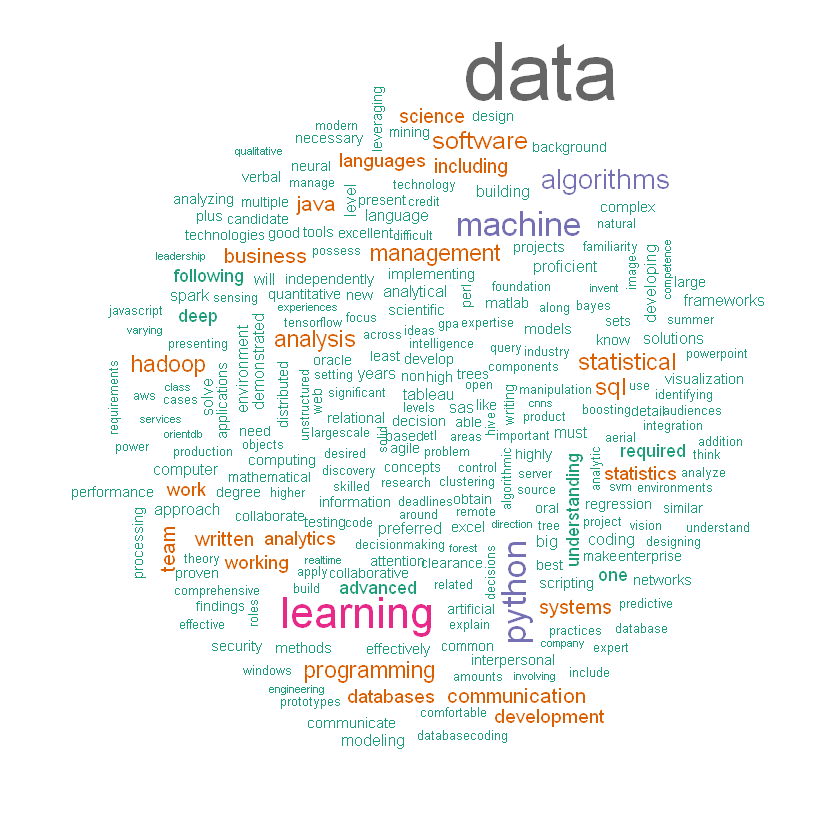

In [38]:
#create wordcloud
wordcloud(text_df$word, freq= text_df$freq, min.freq=1, max.words=250, colors=brewer.pal(8,"Dark2"))

# Next we will use a better wordcloud, word cloud 2 by [Ichiffon](https://github.com/Lchiffon/wordcloud2)

In [19]:
#install wordcloud2. NOTE need devtools
#library(devtools)
#install_github("lchiffon/wordcloud2")
library(wordcloud2)
wordcloud2(data=text_df)

HTML widgets cannot be represented in plain text (need html)

In [26]:
#star shape
wordcloud2(data=text_df, size =0.6, shape='star')

HTML widgets cannot be represented in plain text (need html)

In [36]:
#lighter words and black background
wordcloud2(data=text_df, size =1, color = "random-light", backgroundColor="black")

HTML widgets cannot be represented in plain text (need html)

# Conclusion: looks like the key words in job posts we need are python, data, machine learning, algorithms, statistics, sql, communication, management, programming, and team. 
## I'm assuming I lost R programming in one of my filters. If you can help me recover the lost R, I would be much obliged!
### Thanks for reading my page! Best -Tak Koyanagi